Importando bibliotecas

In [85]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Carregando dados

In [96]:
df = pd.read_csv('data/game_info_treated.csv')
df

,metacritic,rating,playtime,achievements_count,game_series_count,esrb_rating,platform_Mobile,platform_Nintendo,platform_Other,platform_PC,...,genre_Massively_Multiplayer,genre_Platformer,genre_Puzzle,genre_RPG,genre_Racing,genre_Shooter,genre_Simulation,genre_Sports,genre_Strategy,users_drop_percent
0,NaN,0.00,1,80,0,Everyone 10+,0,1,0,1,...,0,0,1,0,0,0,0,0,0,0.000000
1,NaN,0.00,0,26,0,Everyone,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0.000000
2,NaN,0.00,0,0,0,Everyone 10+,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0.333333
3,NaN,0.00,1,0,0,NaN,0,0,0,1,...,1,0,0,1,0,0,0,0,1,NaN
4,NaN,3.07,1,76,19,NaN,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0.658333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33891,NaN,0.00,3,18,0,NaN,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1.000000
33892,74.0,3.84,19,98,0,NaN,0,0,0,1,...,0,0,0,0,0,1,1,0,1,0.701657
33893,NaN,2.54,4,145,0,NaN,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0.714286
33894,NaN,0.00,0,0,0,NaN,1,0,0,1,...,0,1,0,0,0,0,0,0,0,NaN


***
# Avaliações

Quantidade de jogos com rating 0: 22506 de um total de 33896 jogos
Quantidade de jogos com metacritic 0: 29215 de um total de 33896 jogos


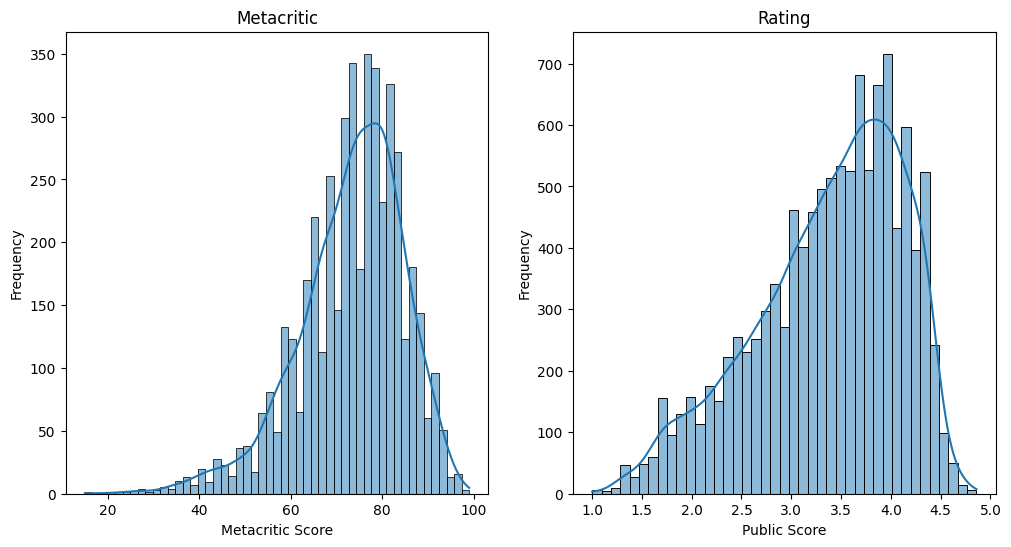

In [87]:
print("Quantidade de jogos com rating 0:", df[df["rating"] == 0].shape[0], "de um total de", df.shape[0], "jogos")
print("Quantidade de jogos com metacritic 0:", df[df["metacritic"].isna()].shape[0], "de um total de", df.shape[0], "jogos")

# Crie lado a lado um histograma dos valores de "metacritic" e "rating"
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['metacritic'], kde=True)
plt.title('Metacritic')
plt.xlabel('Metacritic Score')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(df[df["rating"] != 0]['rating'], kde=True) 
plt.title('Rating')
plt.xlabel('Public Score')
plt.ylabel('Frequency')

plt.show()

# Pairplot

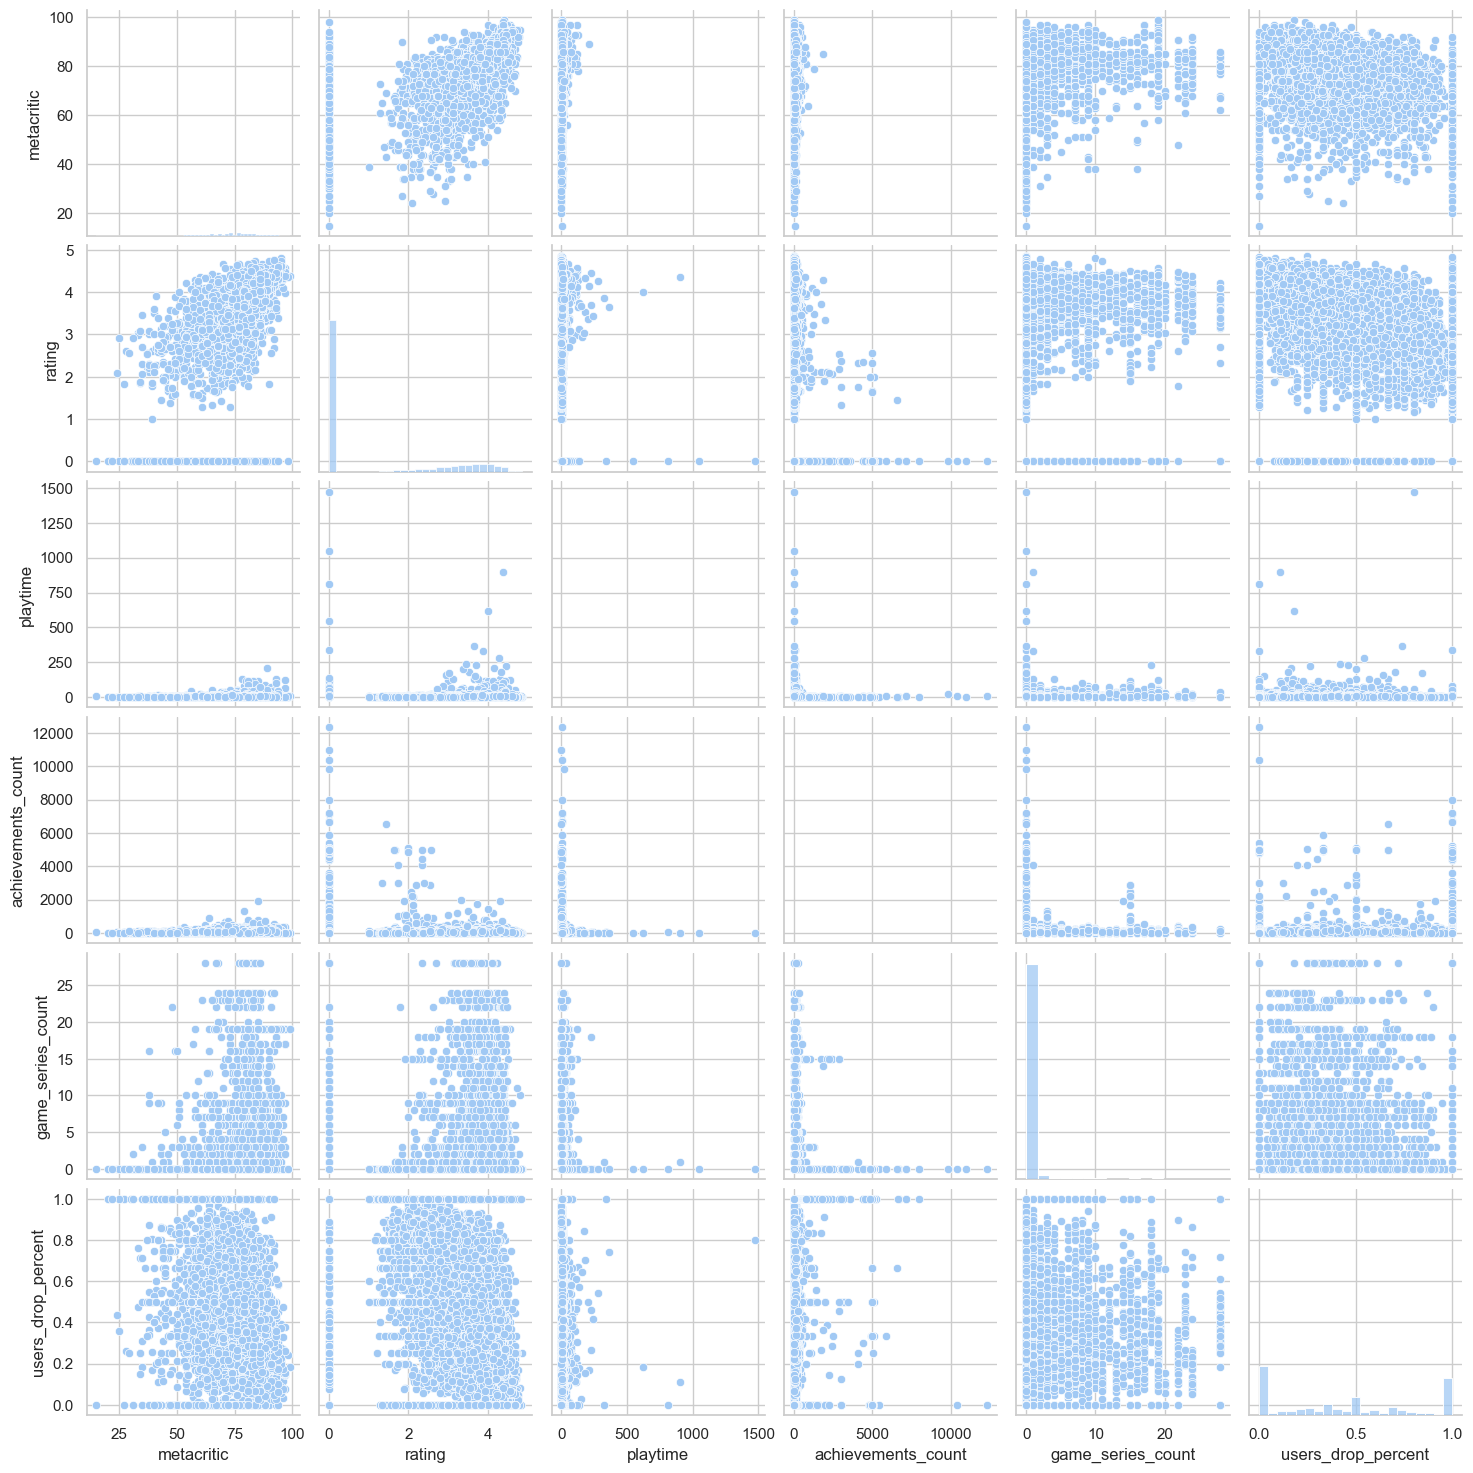

In [112]:
df_cor = df.iloc[:, [0, 1, 2, 3, 4, 5, 31]]
sns.pairplot(df_cor)
plt.show()


# Barplot

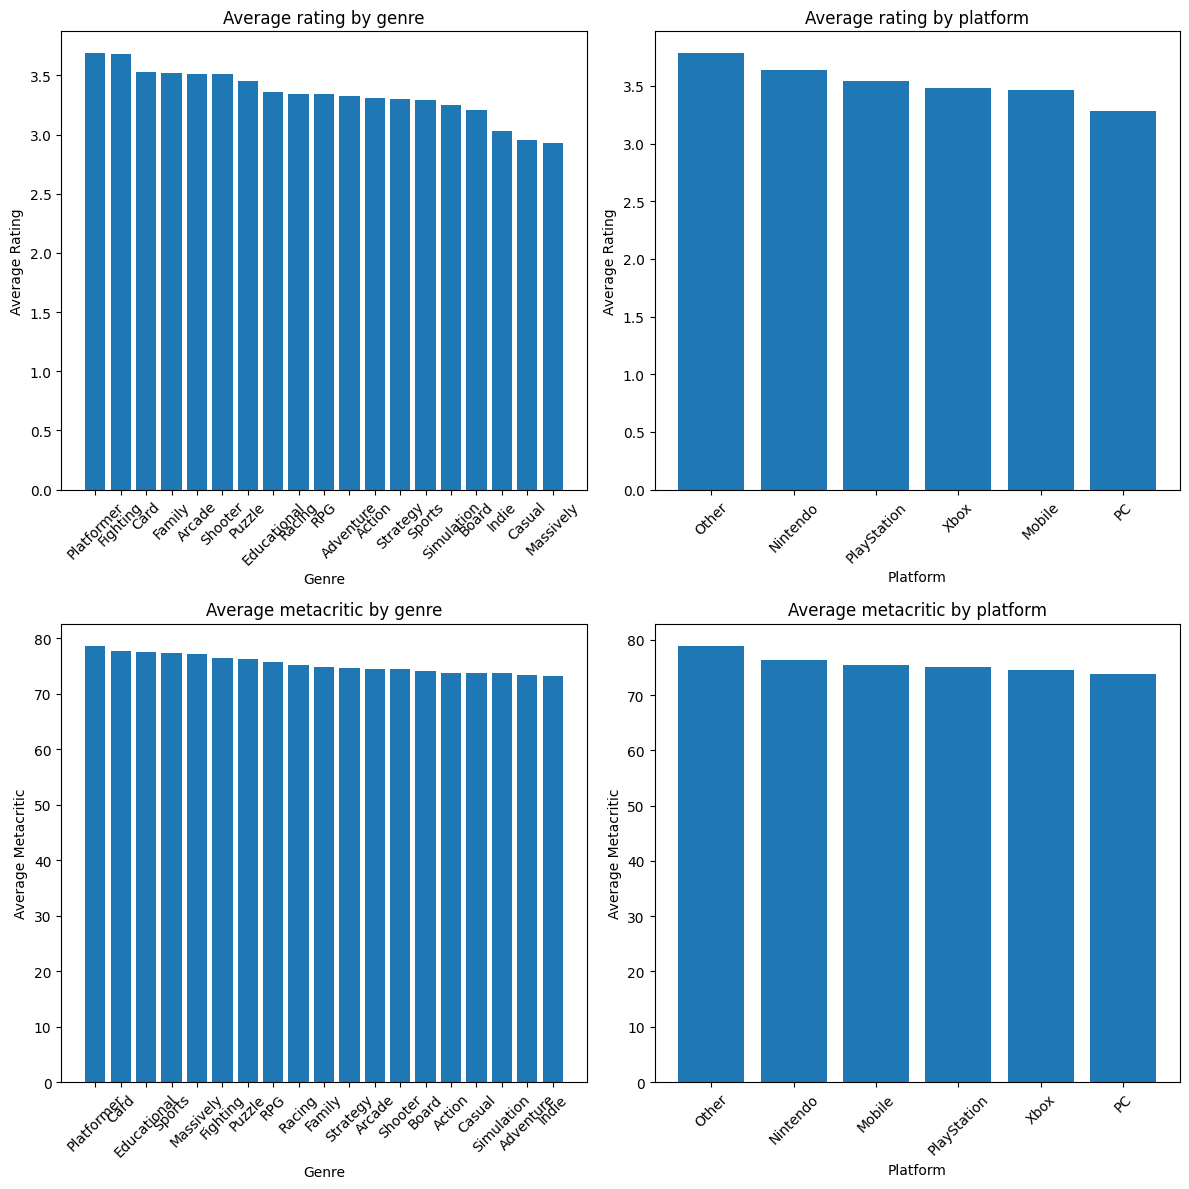

In [92]:
# Plot the two previous in subplots, and add two more barplots for metacritic
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

#plot the ratings by genre
axs[0, 0].bar(ratings.keys(), ratings.values())
axs[0, 0].set_title('Average rating by genre')
axs[0, 0].set_xlabel('Genre')
axs[0, 0].set_ylabel('Average Rating')
axs[0, 0].tick_params(axis='x', rotation=45)

#plot the ratings by platform
axs[0, 1].bar(platforms.keys(), platforms.values())
axs[0, 1].set_title('Average rating by platform')
axs[0, 1].set_xlabel('Platform')
axs[0, 1].set_ylabel('Average Rating')
axs[0, 1].tick_params(axis='x', rotation=45)

#plot the metacritic by genre
metacritic_genre = {}
for col in df0.columns:
    if "genre" in col:
        genre = col.split("_")[1]
        metacritic_genre[genre] = df0[df0[col] == 1]['metacritic'].mean()

metacritic_genre = dict(sorted(metacritic_genre.items(), key=lambda item: item[1])[::-1])
axs[1, 0].bar(metacritic_genre.keys(), metacritic_genre.values())
axs[1, 0].set_title('Average metacritic by genre')
axs[1, 0].set_xlabel('Genre')
axs[1, 0].set_ylabel('Average Metacritic')
axs[1, 0].tick_params(axis='x', rotation=45)

#plot the metacritic by platform
metacritic_platform = {}
for col in df0.columns:
    if "platform" in col:
        platform = col.split("_")[1]
        metacritic_platform[platform] = df0[df0[col] == 1]['metacritic'].mean()

metacritic_platform = dict(sorted(metacritic_platform.items(), key=lambda item: item[1])[::-1])
axs[1, 1].bar(metacritic_platform.keys(), metacritic_platform.values())
axs[1, 1].set_title('Average metacritic by platform')
axs[1, 1].set_xlabel('Platform')
axs[1, 1].set_ylabel('Average Metacritic')
axs[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()



# Heatmap

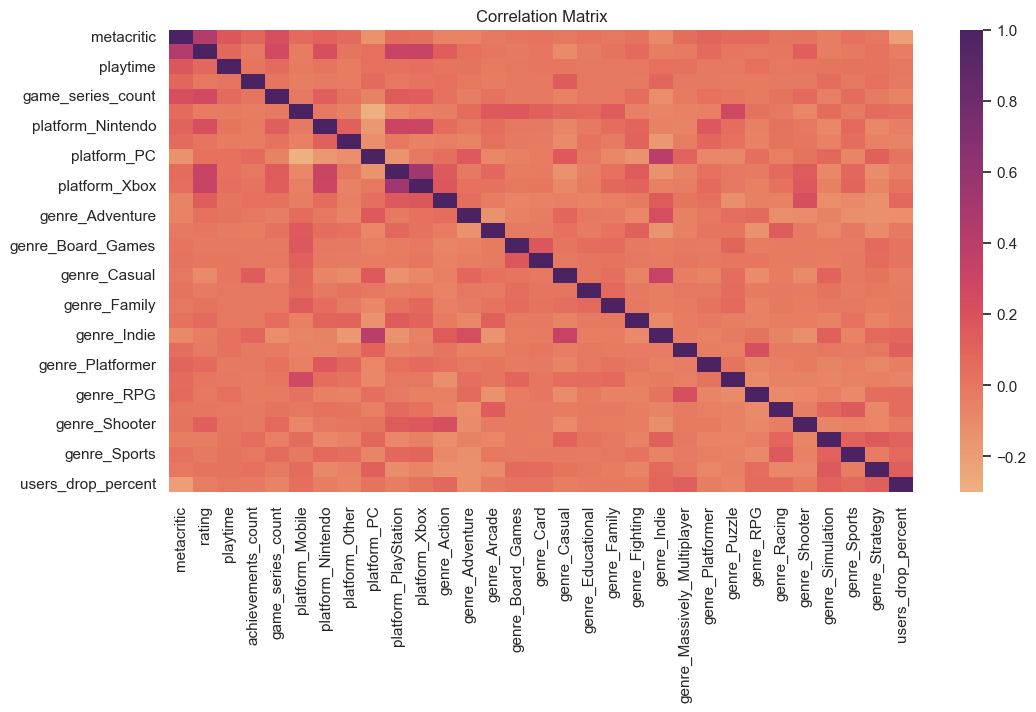

In [142]:
df1 = df.copy(deep=True)
df1 = df1.drop(columns=['esrb_rating'])

# set light colors to low correlation and dark colors to high correlation
correlation = df1.corr()

plt.figure(figsize=(12, 6))
sns.heatmap(correlation, cmap=sns.color_palette("flare", as_cmap=True))
plt.title('Correlation Matrix')
plt.show()
